In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/")
!ls

MyDrive


In [ ]:
os.chdir("/content/drive/My Drive/dataset/")
!ls

adaniport.csv			       Real.csv
credit_card.csv			       sample_sales_data.csv
crop.csv			       solar.csv
crops.pkl			       stock.pkl
cyber.csv			       submission.csv
data.pth			       t1.csv
decision_tree_graphivz.png.png	       test.csv
diabetes.csv			       titanic.csv
Grocery.csv			       train.csv
Loan.pickle			       twittersentiment.csv
Mumbai1.csv			       weather1.csv
mumbai_house_prices_prediction.pickle  winequality.csv
my_model.h5


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [ ]:
df1 = pd.read_csv("twittersentiment.csv",encoding='latin-1')
df1.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df1.columns = ["label", "time", "date", "query", "username", "text"]

In [ ]:
df1.head()

,label,time,date,query,username,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
df2 = df1.drop(['time','date','query','username'],axis='columns')
df2.head()

,label,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
df2.shape

(1599999, 2)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599999 entries, 0 to 1599998
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   label   1599999 non-null  int64 
 1   text    1599999 non-null  object
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [ ]:
df2.isnull().sum()

label    0
text     0
dtype: int64

In [ ]:
df2['label'].unique()

array([0, 4])

In [ ]:
df2[df2['label']==0].head()

,label,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew


In [ ]:
df2[df2['label']==4].head()

,label,text
799999,4,I LOVE @Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! ...
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,4,Being sick can be really cheap when it hurts t...
800003,4,@LovesBrooklyn2 he has that effect on everyone


In [ ]:
df2['label'] = df2['label'].apply(lambda x: 1 if(x==4) else 0)

In [ ]:
df2[df2['label']==1].head()

,label,text
799999,1,I LOVE @Health4UandPets u guys r the best!!
800000,1,im meeting up with one of my besties tonight! ...
800001,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,1,Being sick can be really cheap when it hurts t...
800003,1,@LovesBrooklyn2 he has that effect on everyone


In [ ]:
df2['label'].unique()

array([0, 1])

In [ ]:
df_pos = df2[df2['label'] == 1]
df_neg = df2[df2['label'] == 0]
print(len(df_pos), len(df_neg))

800000 799999


# Data preprocessing

In [ ]:
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,Dropout
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import re, string
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
STOP_WORDS = stopwords.words('english')
print(STOP_WORDS)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in STOP_WORDS:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
df2['text'] = df2['text'].apply(lambda x: preprocess(x))

In [ ]:
df2.head()

,label,text
0,0,upset update facebook texting might cry result...
1,0,dived many times ball managed save 50 rest go ...
2,0,whole body feels itchy like fire
3,0,behaving mad see
4,0,whole crew


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2.text.values,df2.label.values, test_size = 0.20,random_state=20)

In [ ]:
from gensim.models import Word2Vec

Embedding_dimensions = 100
Word2vec_train_data = list(map(lambda x: x.split(), X_train))

In [ ]:
word2vec_model = Word2Vec(Word2vec_train_data,
                 size=Embedding_dimensions,
                 workers=8,
                 min_count=5)

print("Vocabulary Length:", len(word2vec_model.wv.index2word))

TypeError: ignored

In [ ]:
input_length = 60

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
vocab_length = 60000
X_data = df2.text.values
tokenizer = Tokenizer(filters="", lower=False, oov_token="<oov>")
tokenizer.fit_on_texts(X_data)
tokenizer.num_words = vocab_length
print("Tokenizer vocab length:", vocab_length)

Tokenizer vocab length: 60000


In [ ]:
X_train = pad_sequences(tokenizer.texts_to_sequences(X_train), maxlen=input_length)
X_test  = pad_sequences(tokenizer.texts_to_sequences(X_test) , maxlen=input_length)

print("X_train.shape:", X_train.shape)
print("X_test.shape :", X_test.shape)

X_train.shape: (1279999, 60)
X_test.shape : (320000, 60)


In [ ]:
embedding_matrix = np.zeros((vocab_length, Embedding_dimensions))

for word, token in tokenizer.word_index.items():
    if word2vec_model.wv.__contains__(word):
        embedding_matrix[token] = word2vec_model.wv.__getitem__(word)

print("Embedding Matrix Shape:", embedding_matrix.shape)

NameError: ignored

# Visualization

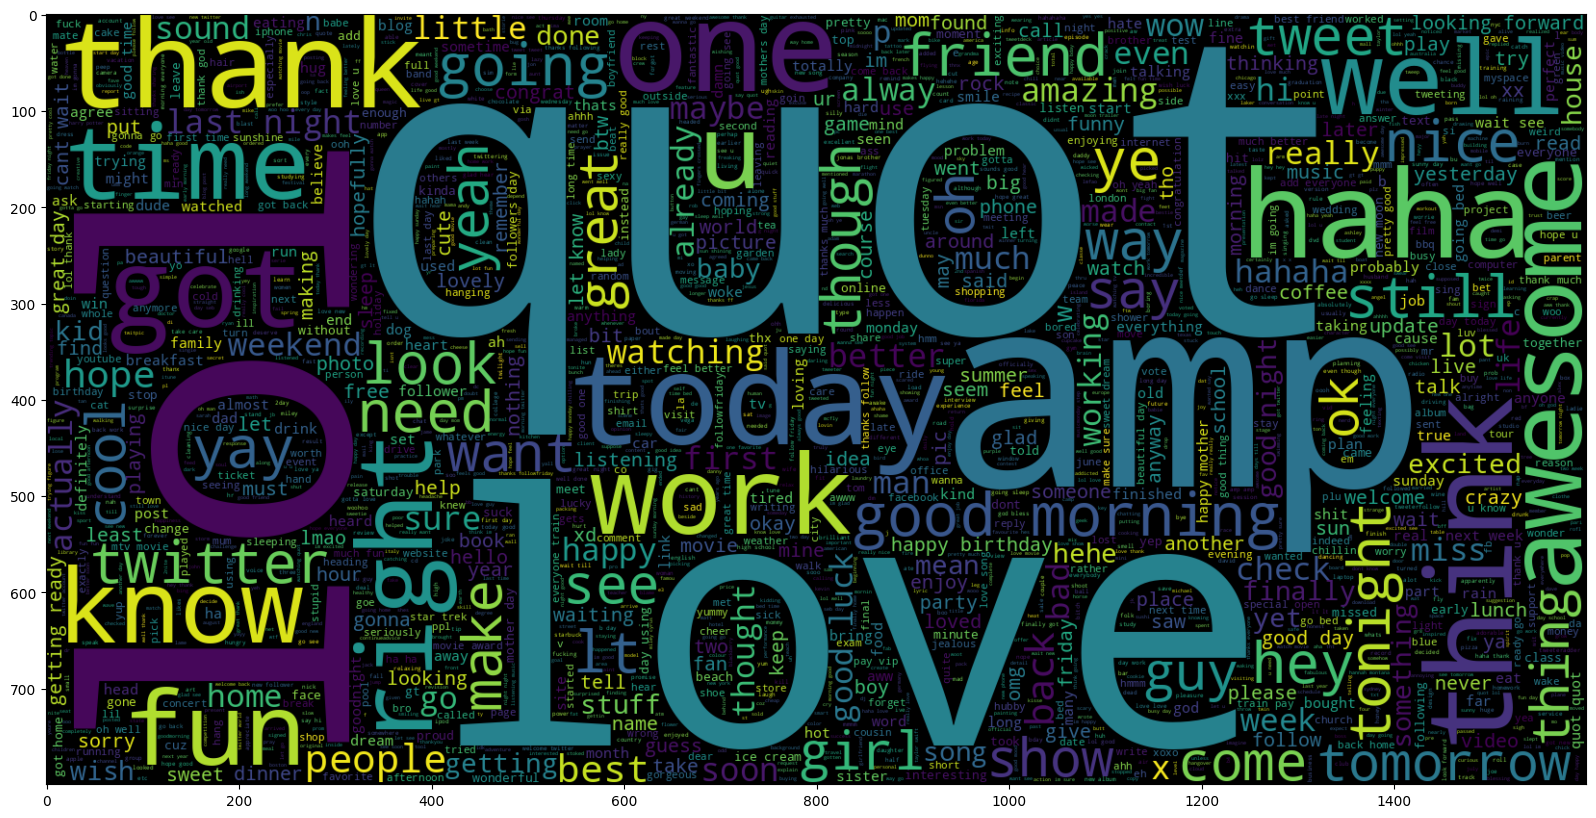

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,10))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df2[df2.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

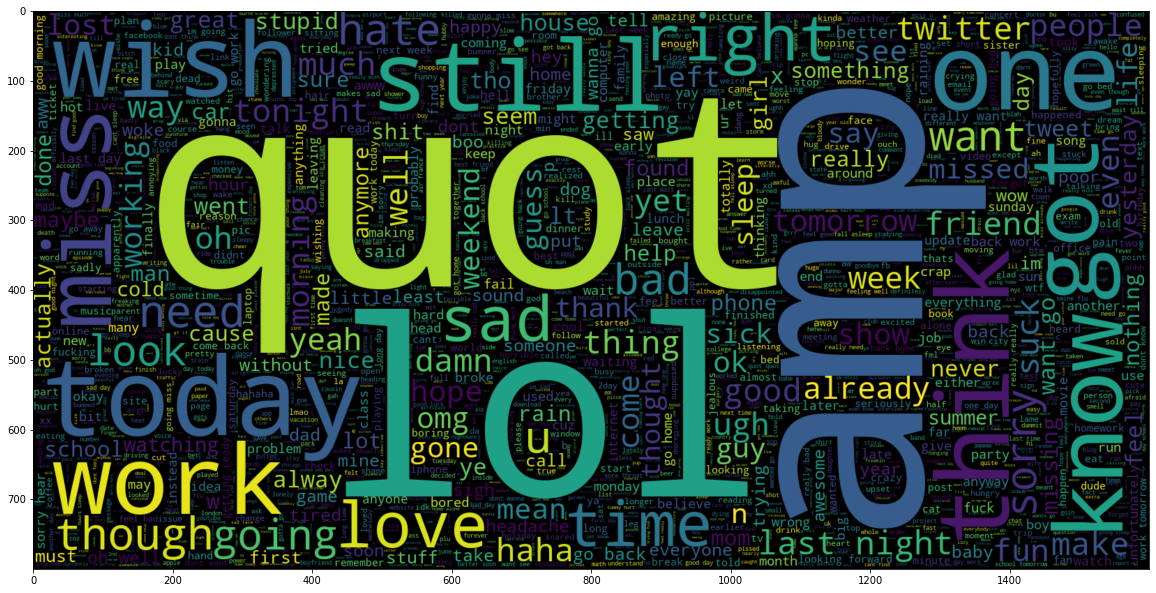

In [ ]:
plt.figure(figsize = (20,20))
#negative
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df2[df2.label == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

# Model

In [ ]:
df2.label.value_counts()

1    800000
0    799999
Name: label, dtype: int64

Text(0.5, 1.0, 'Sentiment Data Distribution')

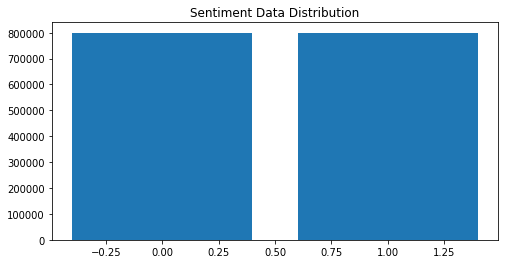

In [ ]:
val_count = df2.label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [ ]:
print( X_train.shape[1])

60


In [ ]:
X_train.shape

(1279999, 60)

Model 1

In [ ]:
embed_dim = 128
model = Sequential()
#model.add(Embedding(500, 120, input_length = X_train.shape[1]))

model.add(Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False))

model.add(Dropout(0.2))
model.add(LSTM(200, dropout = 0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation = "sigmoid"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 100)           6000000   
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm (LSTM)                 (None, 200)               240800    
                                                                 
 dense (Dense)               (None, 32)                6432      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,247,265
Trainable params: 247,265
Non-trainable params: 6,000,000
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=1000,verbose=1)

Epoch 1/5
1280/1280 [==============================] - 61s 42ms/step - loss: 0.4911 - accuracy: 0.7585 - val_loss: 0.4589 - val_accuracy: 0.7796
Epoch 2/5
1280/1280 [==============================] - 55s 43ms/step - loss: 0.4687 - accuracy: 0.7736 - val_loss: 0.4482 - val_accuracy: 0.7861
Epoch 3/5
1280/1280 [==============================] - 57s 45ms/step - loss: 0.4601 - accuracy: 0.7790 - val_loss: 0.4433 - val_accuracy: 0.7899
Epoch 4/5
1280/1280 [==============================] - 56s 44ms/step - loss: 0.4547 - accuracy: 0.7820 - val_loss: 0.4417 - val_accuracy: 0.7913
Epoch 5/5
1280/1280 [==============================] - 57s 45ms/step - loss: 0.4507 - accuracy: 0.7848 - val_loss: 0.4387 - val_accuracy: 0.7926


In [ ]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 39s 4ms/step - loss: 0.4387 - accuracy: 0.7926


[0.43867823481559753, 0.792593777179718]

Model 2

In [ ]:
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional

In [ ]:
embedding_vector_features=128
model1=Sequential()
model1.add(Embedding(input_dim = vocab_length,
                                output_dim = Embedding_dimensions,
                                weights=[embedding_matrix],
                                input_length=input_length,
                                trainable=False))
model1.add(Bidirectional(LSTM(100)))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 60, 100)           6000000   
                                                                 
 bidirectional_1 (Bidirectio  (None, 200)              160800    
 nal)                                                            
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 6,161,001
Trainable params: 161,001
Non-trainable params: 6,000,000
_________________________________________________________________
None


In [ ]:
model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5,batch_size=1000,verbose=0)

Epoch 1/5
1280/1280 [==============================] - 52s 38ms/step - loss: 0.4690 - accuracy: 0.7742 - val_loss: 0.4526 - val_accuracy: 0.7850
Epoch 2/5
1280/1280 [==============================] - 49s 38ms/step - loss: 0.4456 - accuracy: 0.7886 - val_loss: 0.4437 - val_accuracy: 0.7899
Epoch 3/5
1280/1280 [==============================] - 50s 39ms/step - loss: 0.4359 - accuracy: 0.7942 - val_loss: 0.4400 - val_accuracy: 0.7914
Epoch 4/5
1280/1280 [==============================] - 49s 38ms/step - loss: 0.4283 - accuracy: 0.7987 - val_loss: 0.4367 - val_accuracy: 0.7939
Epoch 5/5
1280/1280 [==============================] - 48s 37ms/step - loss: 0.4219 - accuracy: 0.8022 - val_loss: 0.4373 - val_accuracy: 0.7931


In [ ]:
scores = model1.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.7931093573570251


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', scores[1])

Test accuracy: 0.792593777179718


In [ ]:
from sklearn.metrics import accuracy_score

prediction = model.predict(X_test)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ",accuracy_score(y_test,pred_labels))

Accuracy of prediction on test set :  0.79259375


In [ ]:
df2.head()

,label,text
0,0,upset update facebook texting might cry result...
1,0,dived many times ball managed save 50 rest go ...
2,0,whole body feels itchy like fire
3,0,behaving mad see
4,0,whole crew


In [ ]:
df2.tail()

,label,text
1599994,1,woke school best feeling ever
1599995,1,thewdb com cool hear old walt interviews
1599996,1,ready mojo makeover ask details
1599997,1,happy 38th birthday boo alll time tupac amaru ...
1599998,1,happy charitytuesday thenspcc sparkscharity sp...


In [ ]:
twt = ['cry']
#vectorizing the tweet by the pre-fitted tokenizer instance
sequences = tokenizer.texts_to_sequences(twt)
padded = pad_sequences(sequences, padding='pre', maxlen=input_length)
sentiment = model.predict(padded)
print(sentiment)
if(np.argmax(sentiment) == 0):
    print("negative")
else:
    print("positive")

[[0.18294226]]
negative


In [ ]:
twt = ['cry']
#vectorizing the tweet by the pre-fitted tokenizer instance
sequences = tokenizer.texts_to_sequences(twt)
padded = pad_sequences(sequences, padding='pre', maxlen=input_length)
sentiment = model1.predict(padded)
print(sentiment)
if(np.argmax(sentiment) == 0):
    print("negative")
else:
    print("positive")

[[0.03242838]]
negative


In [ ]:
import pickle
word2vec_model.wv.save('Word2Vec-twitter-100')
word2vec_model.wv.save_word2vec_format('Word2Vec-twitter-100-trainable')

# Saving the tokenizer
with open('Tokenizer.pickle', 'wb') as file:
    pickle.dump(tokenizer, file)